<a href="https://colab.research.google.com/github/Gaukhar-ai/for_my_Thinkful_work/blob/master/deep_learning_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import losses
print(tf.__version__)

2.3.0


can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Then, we load the data and do our preprocessing:

In [5]:
input_dim = 784  # 28*28
output_dim = nb_classes = 10
batch_size = 128
nb_epoch = 20

X_train = X_train.reshape(60000, input_dim)
X_test = X_test.reshape(10000, input_dim)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Next we one hot code our target variable using to_categorical function of Keras' utils module:

In [6]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

Now, let's check the size of the data:

In [7]:
X_train[0].shape

(784,)

So, the data we have is a flattened version of the images where each row in the 28x28 matrix is concatenated side by side.

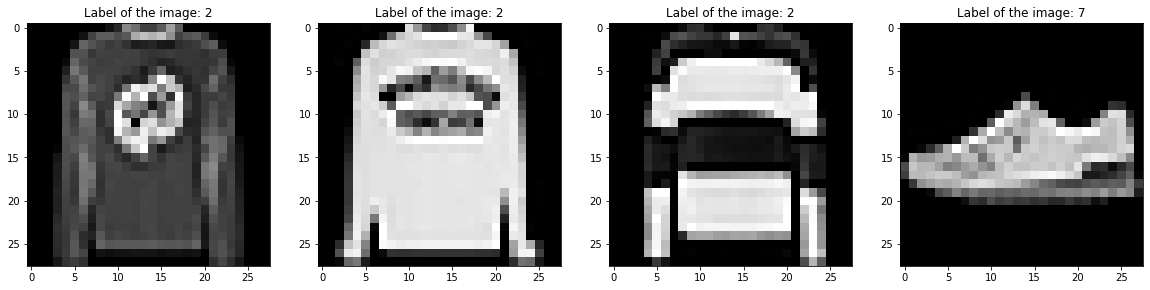

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))

plt.subplot(141)
plt.imshow(X_train[123].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[123]))

plt.subplot(142)
plt.imshow(X_train[124].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[124]))

plt.subplot(143)
plt.imshow(X_train[125].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[125]))

plt.subplot(144)
plt.imshow(X_train[126].reshape(28,28), cmap="gray")
plt.title("Label of the image: {}".format(y_train[126]))

plt.show()

In [9]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="relu"))
# our second dense layer
model.add(Dense(1028, activation="relu"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1028)              806980    
_________________________________________________________________
dense_1 (Dense)              (None, 1028)              1057812   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10290     
Total params: 1,875,082
Trainable params: 1,875,082
Non-trainable params: 0
_________________________________________________________________


Compiling the model

In [13]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [14]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 15s 33ms/step - loss: 0.9573 - accuracy: 0.7166
Epoch 2/20
469/469 [==============================] - 15s 33ms/step - loss: 0.5990 - accuracy: 0.8061
Epoch 3/20
469/469 [==============================] - 15s 33ms/step - loss: 0.5269 - accuracy: 0.8243
Epoch 4/20
469/469 [==============================] - 16s 34ms/step - loss: 0.4892 - accuracy: 0.8344
Epoch 5/20
469/469 [==============================] - 16s 33ms/step - loss: 0.4666 - accuracy: 0.8399
Epoch 6/20
469/469 [==============================] - 15s 33ms/step - loss: 0.4483 - accuracy: 0.8466
Epoch 7/20
469/469 [==============================] - 15s 33ms/step - loss: 0.4368 - accuracy: 0.8493
Epoch 8/20
469/469 [==============================] - 15s 33ms/step - loss: 0.4255 - accuracy: 0.8536
Epoch 9/20
469/469 [==============================] - 15s 33ms/step - loss: 0.4160 - accuracy: 0.8561
Epoch 10/20
469/469 [==============================] - 15s 33ms/step - loss: 0.407

Evaluating the model

In [15]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


Test score: 0.39629846811294556
Test accuracy: 0.8590999841690063


test accuracy is 85% with activation = relu, opimizer = sgd, dense 1028, loss=categorical_crossentropy. When it got to 87% didn't improve futher more, so could be stopped there. 

In [16]:
model = Sequential()
# our first dense layer
model.add(Dense(1028, input_shape=(784,), activation="sigmoid"))
# our second dense layer
model.add(Dense(1028, activation="sigmoid"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [19]:
model.compile(optimizer='adam', loss='hinge',
              metrics=['accuracy'])

In [22]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 2/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 3/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 4/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 5/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 6/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 7/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 8/20
469/469 [==============================] - 17s 36ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 9/20
469/469 [==============================] - 17s 35ms/step - loss: 1.0800 - accuracy: 0.1000
Epoch 10/20
469/469 [==============================] - 17s 36ms/step - loss: 1.080

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.0799994468688965
Test accuracy: 0.10000000149011612


This model acts strange, got to 100% right away and the rest was not necessary. I'm not sure if the model gets to 100% usually, so little skeptic, took longer too, to run. So far it's the best model, needs futher investigation though. 

In [24]:
model = Sequential()
# our first dense layer
model.add(Dense(64, input_shape=(784,), activation="tanh"))
# our second dense layer
model.add(Dense(32, activation="tanh"))
# last layer is the output layer.
model.add(Dense(10, activation="softmax"))

In [25]:
model.compile(optimizer='sgd', loss='hinge',
              metrics=['accuracy'])

In [26]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0777 - accuracy: 0.1367
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0693 - accuracy: 0.2488
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0579 - accuracy: 0.3442
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0467 - accuracy: 0.4083
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0367 - accuracy: 0.4697
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0280 - accuracy: 0.5194
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0206 - accuracy: 0.5752
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 1.0140 - accuracy: 0.6028
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0082 - accuracy: 0.6158
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 1.0034 - accuracy: 0.6210

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.9841978549957275
Test accuracy: 0.6269999742507935


Accuracy is 63% was much faster since i had less number of dense. Activation = tanh, optimizer='sgd', loss='hinge'. 

So far the best performer is the second model with a 100% accuracy. Success!